<a href="https://colab.research.google.com/github/PedroSalomaoR/ML-com-colab/blob/main/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importando bibliotecas

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


definindo o caminho das fotos de treino

In [49]:
base_dir = "pasta_animais/pasta_animais"


Criaando e compilando o modelo com MobileNetV2

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = 160

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False



Montando o modelo com camada densa final

In [51]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


Compilando o modelo

In [52]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [53]:
from PIL import Image
import os

base_dir = "pasta_animais/pasta_animais"  # ajuste se necessário

def verificar_imagens(diretorio):
    num_removidos = 0
    for pasta_classe in os.listdir(diretorio):
        pasta_completa = os.path.join(diretorio, pasta_classe)
        if not os.path.isdir(pasta_completa):
            continue
        for arquivo in os.listdir(pasta_completa):
            caminho_arquivo = os.path.join(pasta_completa, arquivo)
            try:
                img = Image.open(caminho_arquivo)
                img.verify()
            except (IOError, SyntaxError):
                print(f"Arquivo corrompido removido: {caminho_arquivo}")
                os.remove(caminho_arquivo)
                num_removidos += 1
    print(f"Total de arquivos removidos: {num_removidos}")

verificar_imagens(base_dir)


Total de arquivos removidos: 0


Treinando o modelo

In [54]:
EPOCHS = 5


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 491s 777ms/step - accuracy: 0.9335 - loss: 0.1554 - val_accuracy: 0.9744 - val_loss: 0.0659
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 493s 788ms/step - accuracy: 0.9784 - loss: 0.0580 - val_accuracy: 0.9732 - val_loss: 0.0663
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 487s 780ms/step - accuracy: 0.9801 - loss: 0.0531 - val_accuracy: 0.9764 - val_loss: 0.0632
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 485s 777ms/step - accuracy: 0.9824 - loss: 0.0487 - val_accuracy: 0.9770 - val_loss: 0.0607
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 525s 841ms/step - accuracy: 0.9818 - loss: 0.0486 - val_accuracy: 0.9774 - val_loss: 0.0632


Resultado do treino

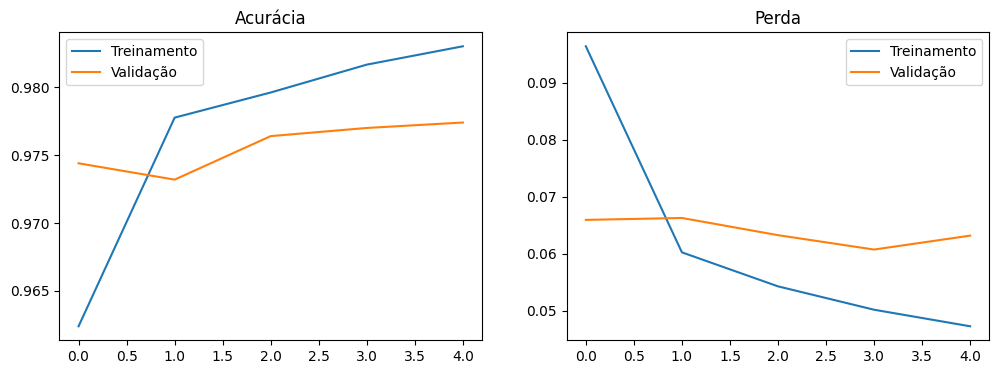

In [55]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treinamento')
plt.plot(epochs_range, val_acc, label='Validação')
plt.legend()
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treinamento')
plt.plot(epochs_range, val_loss, label='Validação')
plt.legend()
plt.title('Perda')

plt.show()
